# Part 1: Evaluating the given model

In [0]:
# Holy Incantations
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils import np_utils

In [0]:
# Keras provides the option to download the CIFAR10 dataset using its API
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape

# CIFAR 10 dataset has 10 unique classes 
num_classes = len(np.unique(train_labels))

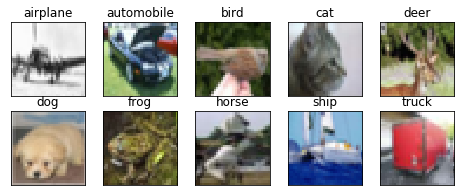

In [126]:
# class_names contain the 10 names for 10 unique classes
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

'''
We should always look at some sample of images before constructing any model
as it helps in determinig the size of final receptive field, placement of first
pool layer in the network.
'''
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
'''
Standardising the images which helps in faster convergence.
Also, below we are converting the y labels to one hot encoding.
'''
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [130]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) # rf: 3, output_size(os): 32x32
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) # rf:5, os: 30x30
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # rf:6, os:15x15
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) # rf:10, os: 15x15
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))# rf:14, os: 13x13
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # rf: 16, os: 6x6
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) # rf: 24, os: 6x6
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) # rf: 32, os: 4x4
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # rf: 36, os: 2x2
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [131]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_130 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_145 (Conv2D)          (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_131 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_75 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 27s 70ms/step - loss: 1.8702 - acc: 0.2823 - val_loss: 1.4424 - val_acc: 0.4695
Epoch 2/50
390/390 [==============================] - 20s 52ms/step - loss: 1.3833 - acc: 0.4980 - val_loss: 1.2433 - val_acc: 0.5493
Epoch 3/50
390/390 [==============================] - 20s 52ms/step - loss: 1.1668 - acc: 0.5866 - val_loss: 1.0226 - val_acc: 0.6385
Epoch 4/50
390/390 [==============================] - 20s 52ms/step - loss: 1.0142 - acc: 0.6435 - val_loss: 0.9225 - val_acc: 0.6771
Epoch 5/50
390/390 [==============================] - 20s 52ms/step - loss: 0.9108 - acc: 0.6847 - val_loss: 0.8094 - val_acc: 0.7180
Epoch 6/50
390/390 [==============================] - 20s 52ms/step - loss: 0.8373 - acc: 0.7124 - val_loss: 0.7632 - val_acc: 0.7333
Epoch 7/50
390/390 [==============================] - 20s 52ms/step - loss: 0.7780 - acc: 0.7346 - val_loss: 0.7136 - val_acc: 0.7533
Epoch 8/50
390/390 [==============================] - 20s 52ms

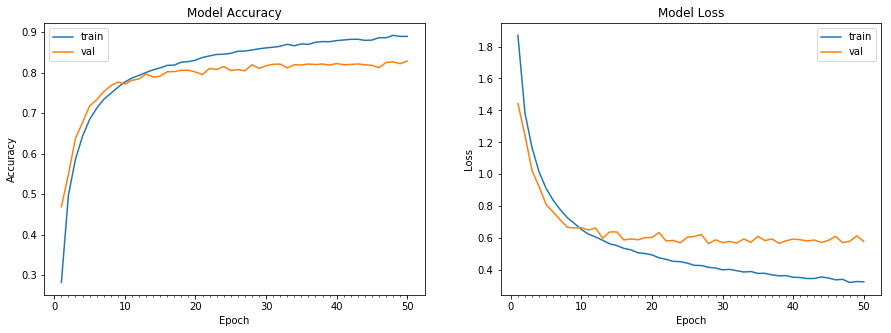

Accuracy on test data is: 82.87


In [132]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

# Part 2: Fixing the above model

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))


In [0]:
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# normalising the training and test data
train_features = train_features.astype('float32')
test_features = test_features.astype('float32')
train_feature_mean = np.mean(train_features, axis=(0,1,2))
train_feature_std = np.std(train_features, axis=(0,1,2))
train_features_norm = (train_features-train_feature_mean)/train_feature_std
test_features_norm = (test_features-train_feature_mean)/train_feature_std

In [0]:
'''
Changes in the below model as compared to the above model:

1. Dense layers are removed as we lose the spatial features and in turn we  
   introduce a lot of parameters in the model without much improvement in accuracy 
2. We are using 1x1 conv layers 
3. We have introduced Batch Normalisation which helps in faster training as  
   well as regularization
4. Maxpooling layer is not used at the end of the network
5. Dropouts are introduced after every 3x3 conv layer except the last one as
   dropping pixels just near the softmax layer might not be very helpful

'''

# Define the model
model = Sequential()
model.add(Convolution2D(32, 3, padding='same', input_shape=(32, 32, 3))) # rf: 3, os: 32x32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, padding='same')) # rf: 5, os: 32x32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, padding='same')) # rf: 7, os: 32x32
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # rf: 8, os: 16x16

model.add(Convolution2D(32, 1)) # rf: 8, os: 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 3, padding='same')) # rf: 12, os: 16x16
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, padding='valid')) # rf: 16, os: 14x14
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2))) # rf: 18, os: 7x7

model.add(Convolution2D(32, 1)) # rf: 18, os: 7x7
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 7)) # rf: 42, os: 1x1
model.add(Flatten())
model.add(Activation('softmax'))

In [99]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_124 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_83 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_106 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_84 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
activation_107 (Activation)  (None, 32, 32, 64)      

In [0]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# using learning rate scheduler to decrease the learning gradulally as the 
# number of epochs increases

def scheduler(epoch):
  if epoch < 10:
    return 0.001
  else:
    return 0.001 * np.exp(0.1 * (10 - epoch))

lr_scheduler = LearningRateScheduler(scheduler)

# modelcheckpoint = ModelCheckpoint()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390.625, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., epochs=50)`
  app.launch_new_instance()


Epoch 1/50
391/390 [==============================] - 52s 132ms/step - loss: 1.5972 - acc: 0.4157 - val_loss: 1.4712 - val_acc: 0.5056
Epoch 2/50
391/390 [==============================] - 43s 109ms/step - loss: 1.2495 - acc: 0.5517 - val_loss: 1.1395 - val_acc: 0.5988
Epoch 3/50
391/390 [==============================] - 43s 109ms/step - loss: 1.1005 - acc: 0.6082 - val_loss: 1.0942 - val_acc: 0.6366
Epoch 4/50
391/390 [==============================] - 42s 108ms/step - loss: 1.0052 - acc: 0.6466 - val_loss: 1.1533 - val_acc: 0.6289
Epoch 5/50
391/390 [==============================] - 43s 110ms/step - loss: 0.9369 - acc: 0.6731 - val_loss: 0.9735 - val_acc: 0.6851
Epoch 6/50
391/390 [==============================] - 42s 108ms/step - loss: 0.8855 - acc: 0.6906 - val_loss: 1.1696 - val_acc: 0.6651
Epoch 7/50
391/390 [==============================] - 42s 108ms/step - loss: 0.8504 - acc: 0.7029 - val_loss: 1.0320 - val_acc: 0.6817
Epoch 8/50
391/390 [==============================] - 4

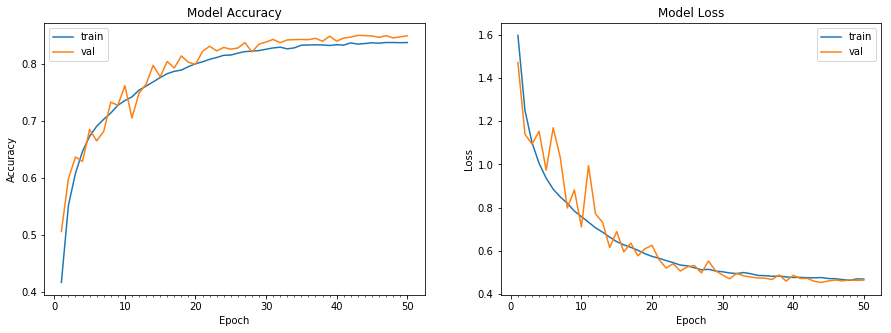

Accuracy on test data is: 14.38


In [101]:
from keras.preprocessing.image import ImageDataGenerator

# Using data augmentation techniques to generalise the model further 
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True)

datagen.fit(train_features)

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features_norm, train_labels, batch_size = 128),
                                 steps_per_epoch = train_features.shape[0]/128, nb_epoch = 50, 
                                 validation_data = (test_features_norm, test_labels), 
                                 verbose=1, callbacks=[lr_scheduler])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

Reading logs of the model training above, we can clearly see that model is
  very nicely generalised unlike the previous one where as the number of epochs 
  increased the gap between the training and validation accuracy increased as well.
  Also, we have surpassed the accuracy achieved in the previous model with using 
  less than 1/5th of the paramters. 